In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("heroes_information.csv")
df1 = pd.read_csv('super_hero_powers.csv')

In [6]:
df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [8]:
df.shape

(734, 11)

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,734.0,NaN,NaN,NaN,366.5,212.031837,0.0,183.25,366.5,549.75,733.0
name,734,715,Goliath,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,734,3,Male,505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eye color,734,23,blue,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,734,62,-,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hair color,734,30,-,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,734.0,NaN,NaN,NaN,102.254087,139.624543,-99.0,-99.0,175.0,185.0,975.0
Publisher,719,24,Marvel Comics,388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Skin color,734,17,-,662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alignment,734,4,good,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Описание данных
- name (Имя) - Имя супергероя.
- Gender (Пол) - Пол супергероя (мужской, женский).
- Eye color (Цвет глаз) - Цвет глаз супергероя.
- Race (Раса) - Раса или происхождение супергероя (человек, инопланетянин, мутант и т.д.).
- Hair color (Цвет волос) - Цвет волос супергероя.
- Height (Рост) - Рост супергероя, измеренный в футах и дюймах.
- Publisher (Издатель) - Компания, выпустившая персонажа (Marvel, DC и т.д.).
- Skin color (Цвет кожи) - Цвет кожи супергероя.
- Alignment (Выравнивание) - Моральное выравнивание супергероя (хороший, нейтральный, злой).
- Weight (Вес) - Масса супергероя, измеренная в фунтах.

 Есть пустые значения, есть анамальные значения.

In [30]:
# Проверка на дубликаты
df.duplicated().sum()   

0

In [10]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isna().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [32]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке Unnamed: 0 = 0
Кол-во пропусков в колонке name = 0
Кол-во пропусков в колонке Gender = 0
Кол-во пропусков в колонке Eye color = 0
Кол-во пропусков в колонке Race = 0
Кол-во пропусков в колонке Hair color = 0
Кол-во пропусков в колонке Height = 0
Кол-во пропусков в колонке Publisher = 15
Кол-во пропусков в колонке Skin color = 0
Кол-во пропусков в колонке Alignment = 0
Кол-во пропусков в колонке Weight = 2


In [33]:
for col in df.columns:
    print(f'Кол-во пропусков в колонке {col} ={df[col].isna().sum()/df.shape[0] * 100:.2f} % ')

Кол-во пропусков в колонке Unnamed: 0 =0.00 % 
Кол-во пропусков в колонке name =0.00 % 
Кол-во пропусков в колонке Gender =0.00 % 
Кол-во пропусков в колонке Eye color =0.00 % 
Кол-во пропусков в колонке Race =0.00 % 
Кол-во пропусков в колонке Hair color =0.00 % 
Кол-во пропусков в колонке Height =0.00 % 
Кол-во пропусков в колонке Publisher =2.04 % 
Кол-во пропусков в колонке Skin color =0.00 % 
Кол-во пропусков в колонке Alignment =0.00 % 
Кол-во пропусков в колонке Weight =0.27 % 


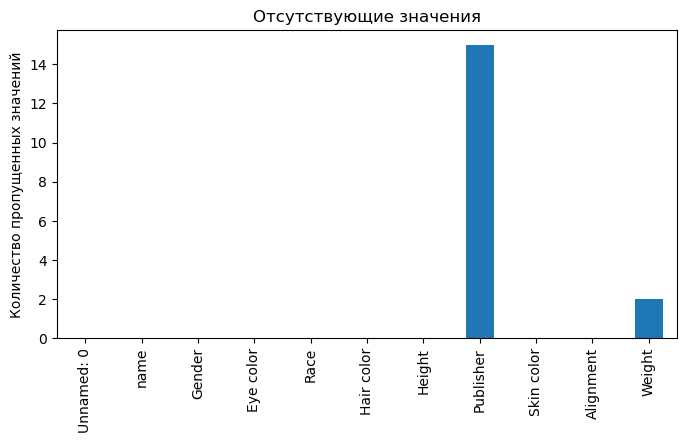

In [11]:
# Подсчет пропущенных значений в каждом столбце
missing_data = df.isna().sum()

# Построение гистограммы пропущенных значений
missing_data.plot(kind='bar', figsize=(8, 4))
plt.title("Отсутствующие значения")
plt.ylabel("Количество пропущенных значений")
plt.show()

In [12]:
# Проверка на дублирование записей
df.duplicated().sum()

0

In [13]:
df['Publisher'] = df['Publisher'].fillna(value=df['Publisher'].mode()[0])

In [14]:
df['Weight'] = df['Weight'].fillna(value=df['Weight'].mode()[0])

In [15]:
df.isna().sum()

Unnamed: 0    0
name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [16]:
df['Publisher'].value_counts()

Marvel Comics        403
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

In [40]:
df['Weight'].value_counts()

-99.0     239
 54.0      23
 79.0      23
 81.0      22
 90.0      19
         ... 
 119.0      1
 48.0       1
 4.0        1
 115.0      1
 17.0       1
Name: Weight, Length: 135, dtype: int64

Изменили аномальные значения

In [41]:
df['Height'] = df['Height'].abs()
df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,99.0,Marvel Comics,-,bad,-99.0


In [43]:
df['Weight'] = df['Weight'].abs()
df.head(10)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,99.0,Marvel Comics,-,bad,99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,99.0,NBC - Heroes,-,good,99.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [45]:
df['Gender'].value_counts()

Male      505
Female    200
-          29
Name: Gender, dtype: int64

неопределенный пол просто удаляем

In [53]:
df = df.loc[df['Gender'] != '-']
df['Gender'].value_counts()

Male      505
Female    200
Name: Gender, dtype: int64

видим пустые значения цвета глаз

In [46]:
df['Eye color'].value_counts()

blue                       225
-                          172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
violet                       2
yellow (without irises)      2
amber                        2
white / red                  1
yellow / blue                1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / red                 1
bown                         1
Name: Eye color, dtype: int64

In [52]:
df['Eye color']=df['Eye color'].replace('-', 'No Eyes')
df['Eye color'].value_counts()

blue                       225
No Eyes                    172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
violet                       2
yellow (without irises)      2
amber                        2
white / red                  1
yellow / blue                1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / red                 1
bown                         1
Name: Eye color, dtype: int64

In [47]:
df['Race'].value_counts()

-                    304
Human                208
Mutant                63
God / Eternal         14
Human / Radiation     11
                    ... 
Gorilla                1
Rodian                 1
Flora Colossus         1
Human-Vuldarian        1
Yoda's species         1
Name: Race, Length: 62, dtype: int64

In [48]:
df['Hair color'].value_counts()

-                   172
Black               158
Blond                99
Brown                86
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Silver                4
Brown / White         4
blond                 3
black                 3
Blue                  3
Orange                2
Yellow                2
Indigo                1
Brownn                1
Red / White           1
Red / Orange          1
Gold                  1
Magenta               1
Orange / White        1
Red / Grey            1
Brown / Black         1
Pink                  1
Black / Blue          1
Name: Hair color, dtype: int64

видим что есть 172 пустых значений

In [51]:
df['Hair color']=df['Hair color'].replace('-', 'No Hair')
df['Hair color'].value_counts()

No Hair             247
Black               158
Blond                99
Brown                86
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Silver                4
Brown / White         4
blond                 3
black                 3
Blue                  3
Orange                2
Yellow                2
Indigo                1
Brownn                1
Red / White           1
Red / Orange          1
Gold                  1
Magenta               1
Orange / White        1
Red / Grey            1
Brown / Black         1
Pink                  1
Black / Blue          1
Name: Hair color, dtype: int64

Изменили пустые значения цвета на значение "нет волос"

In [49]:
df['Publisher'].value_counts()

Marvel Comics        403
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

In [54]:
df['Skin color'].value_counts()

-                 635
green              21
red                 9
blue                9
white               7
silver              5
grey                4
purple              3
yellow              2
pink                2
gold                2
red / black         1
black               1
orange / white      1
gray                1
blue-white          1
orange              1
Name: Skin color, dtype: int64

In [59]:
df['Skin color']=df['Skin color'].replace('-', 'Not defined')
df['Skin color'].value_counts()

C:\Users\МОиБД\AppData\Local\Temp\ipykernel_1976\3267050410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Skin color']=df['Skin color'].replace('-', 'Not defined')


Not defined       629
green              21
red                 9
blue                9
white               7
silver              5
grey                4
purple              3
yellow              2
pink                2
gold                2
red / black         1
black               1
orange / white      1
gray                1
blue-white          1
orange              1
Name: Skin color, dtype: int64

назовем неопределенными пустые значения цвета кожи

In [57]:
df['Alignment'].value_counts()

good       477
bad        200
neutral     22
-            6
Name: Alignment, dtype: int64

In [58]:
df = df.loc[df['Alignment'] != '-']
df['Alignment'].value_counts()

good       477
bad        200
neutral     22
Name: Alignment, dtype: int64

In [62]:
df.isna().sum()

Unnamed: 0    0
name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

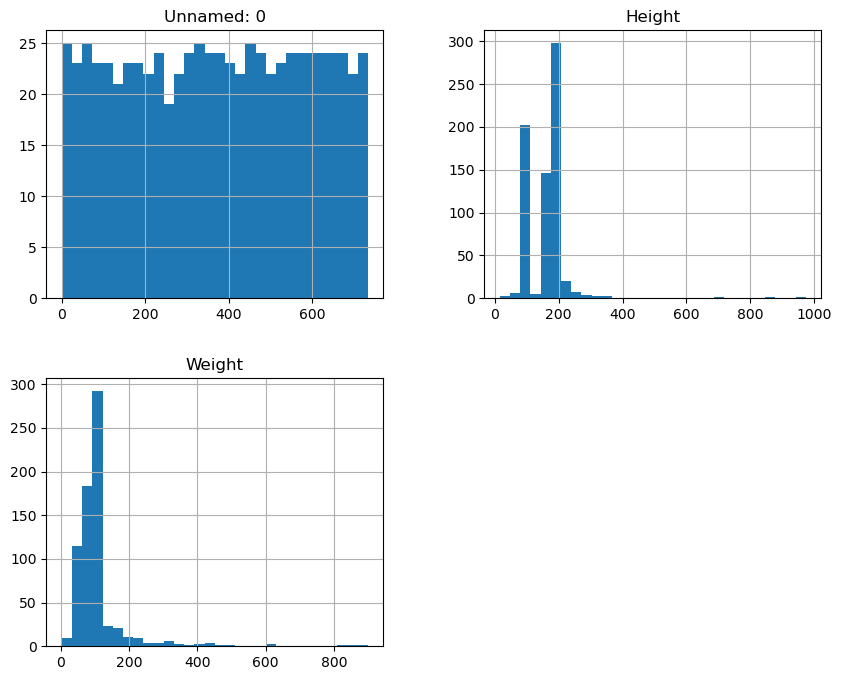

In [65]:
df.hist(figsize=(10, 8),  bins=30);

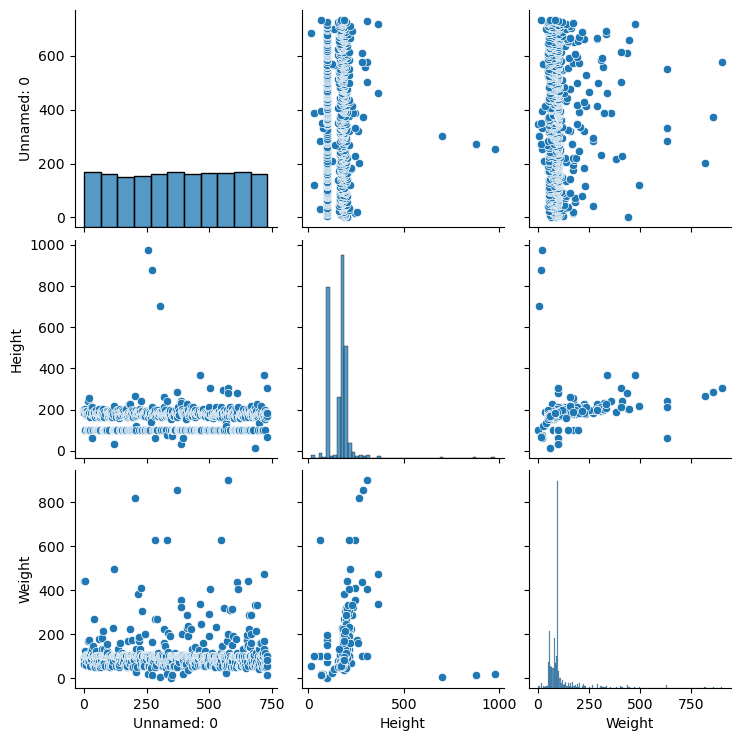

In [67]:
sns.pairplot(df)

In [68]:
df['Skin color']

0      Not defined
1             blue
2              red
3      Not defined
4      Not defined
          ...     
729    Not defined
730          white
731          green
732    Not defined
733    Not defined
Name: Skin color, Length: 699, dtype: object

In [69]:
df['Publisher']

0          Marvel Comics
1      Dark Horse Comics
2              DC Comics
3          Marvel Comics
4          Marvel Comics
             ...        
729        Marvel Comics
730        Marvel Comics
731         George Lucas
732            DC Comics
733            DC Comics
Name: Publisher, Length: 699, dtype: object

C:\Users\МОиБД\AppData\Local\Temp\ipykernel_1976\4187711742.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher','Skin color','Alignment', 'Weight']].corr(), annot=True);


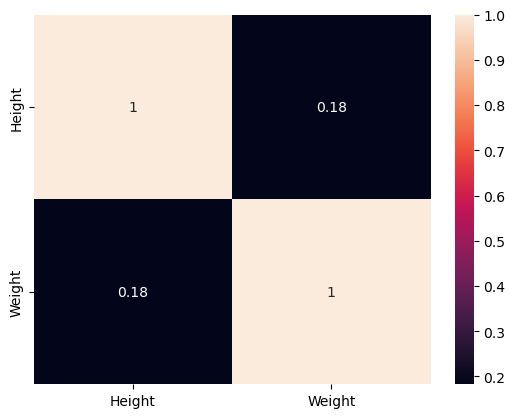

In [72]:
sns.heatmap(df[['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher','Skin color','Alignment', 'Weight']].corr(), annot=True);

# Вывод

Заполнили пустые значения, добавили новые названия неопределенным полям, исправили аномальные значения высоты и ширины. Сделали визуализацию.